# Lab 09 Exercises: Algorithms

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1\. (done) Maximum wind speed prediction at the Sprogø station

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, *it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile*.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for *fitting the quantile function*. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



The cumulative density function (CDF) is defined as 

${p(x) = \mathbb{P}[y \leq x]}$

Here we need to *estimate* this function from a very narrow data sample. The least biased approach is to assume that the data we have reflects well the underlying cumulative probability function. Therefore, we assume that

${p(x_i) == \mathbb{P}[x_j \leq x_i]}$  for $x_j$ in data points



In [1]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
print(f"data shape: {max_speeds.shape}")# Data consists of one measure per year...
print("data: ", max_speeds) # ... the value is the max speed registered that year.

data shape: (21,)
data:  [28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]


<BarContainer object of 6 artists>

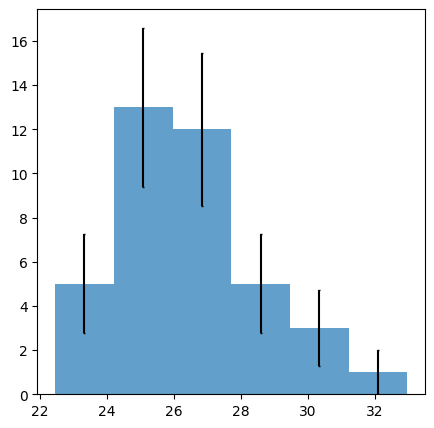

In [2]:
# Quick histo
import matplotlib.pyplot as plt

x = max_speeds
n_bins = 6
delta_x = ( np.max(x) - np.min(x) )/ n_bins
bin_left_edges = [np.min(x) + n * delta_x for n in range(0, n_bins)]
bin_centers = [( np.min(x)+ delta_x/2. ) + n * delta_x for n in range(0, n_bins)]
binned_counts = [np.sum([1 for x_point in x if np.abs(x_point - bin_centers[i]) <= delta_x]) for i in range(n_bins)]
binned_std = [np.sqrt(counts) if counts != 0 else 0 for counts in binned_counts]    


fig, axs = plt.subplots(nrows= 1, ncols= 1, figsize = (5, 5))
axs.bar(x = bin_centers, height= binned_counts, width = delta_x,
                  align= 'center', alpha = 0.7,
                  yerr = binned_std, capsize = delta_x/4.)

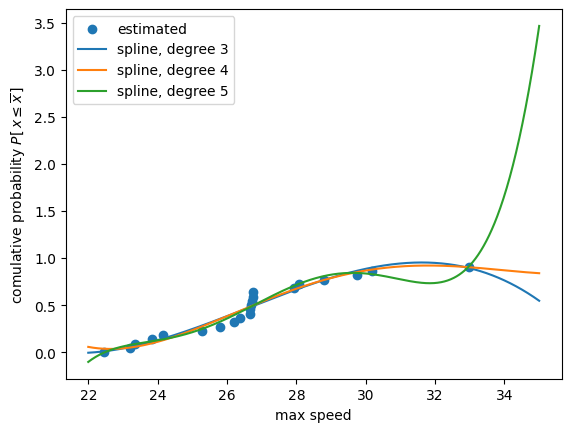

In [19]:
# Compute the experimental cumulative probability
x = np.sort(max_speeds)
P = np.array([ i/(x.shape[0]+1) for i in range(x.shape[0])])

fig, ax = plt.subplots()
ax.scatter(x, P, label = "estimated")
ax.set_xlabel("max speed")
ax.set_ylabel(r"comulative probability $P[\,x \leq \overline{x}\,]$")

# Fit with cubic spline 
from scipy.interpolate import UnivariateSpline
for k in range(3,6):
    spline = UnivariateSpline(x = x, y= P, k=k) # 
    # smooth data
    x_smooth = np.linspace(22, 35, 1000)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, label = f"spline, degree {k}")
ax.legend()

The problem with this spline interpolation is that it doesn't enforce the constraints $P \in [0, 1]$. The trick is to interpolate P versus max speed instead. This way the interval [0, 1] is fixed (the spline is forced to assumne *some* value in 0 and in 1).


Also, now spline(P) directly returns the quantile.


3: 34.63345579700953
4: 36.767895762518286
5: 35.98225657333526


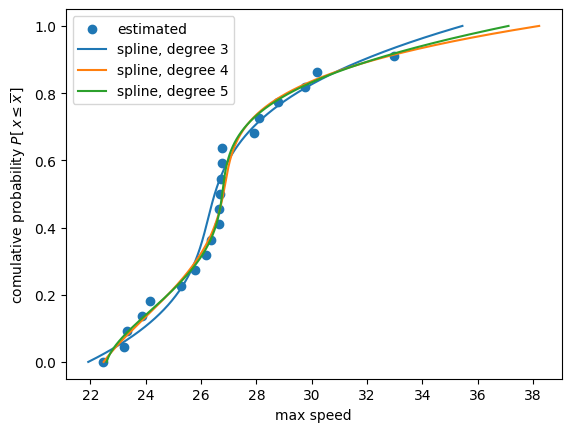

In [23]:
# Compute the experimental cumulative probability
x = np.sort(max_speeds)
P = np.array([ i/(x.shape[0]+1) for i in range(x.shape[0])])

fig, ax = plt.subplots()
ax.scatter(x, P, label = "estimated")
ax.set_xlabel("max speed")
ax.set_ylabel(r"comulative probability $P[\,x \leq \overline{x}\,]$")

# Fit with cubic spline 
from scipy.interpolate import UnivariateSpline


fifty_prob = 1. -0.02 

for k in range(3,6):
    spline = UnivariateSpline(x = P, y= x, k=k) # 
    # smooth data
    y_smooth = np.linspace(0, 1, 1000)
    x_smooth = spline(y_smooth)
    ax.plot(x_smooth, y_smooth, label = f"spline, degree {k}")
    fifty_wind = spline(fifty_prob)
    print(f"{k}: {fifty_wind}")

ax.legend()




## 2\. (done) Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

maximum of min temperature reached at month: 7.164525949871965 +- 0.04720699271426423.
maximum of min temperature reached at month: 7.164525949871965 +- 0.04720699271426423.


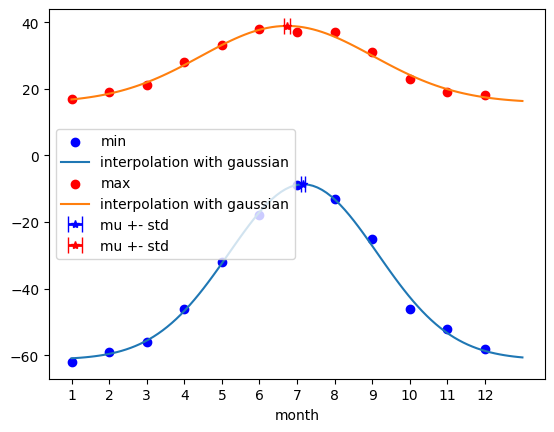

In [58]:
from scipy.optimize import curve_fit

def gauss(x:np.ndarray, mu, sigma, N, offset)->np.ndarray:
    #N = 1./( sigma * (2 * np.pi)**(1./2) ) the function must NOT be normalized to 1
    return N * np.exp(- (1./2.)* ((x- mu)/ sigma)**2) + offset

max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1, 13)


x_smooth = np.linspace(1,13, 100)


fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.scatter(months, min, color = "blue", label = "min")
popt, pcov = curve_fit(gauss, months, min)
ax.plot(x_smooth, gauss(x_smooth, *popt), label = "interpolation with gaussian")
x_max_max = popt[0]
std_max_max = np.sqrt(pcov[0,0])
ax.errorbar(x_max_max, gauss(x_max_max, *popt), xerr = std_max_max,  fmt='*', linewidth=2, capsize=6, color = "blue",  label = "mu +- std")
print(rf"maximum of min temperature reached at month: {x_max_max} +- {std_max_max}.")

ax.scatter(months, max, color = "red", label = "max")
popt, pcov = curve_fit(gauss, months, max)
ax.plot(x_smooth, gauss(x_smooth, *popt), label = "interpolation with gaussian")
x_min_max = popt[0]
std_min_max = np.sqrt(pcov[0,0])
ax.errorbar(x_min_max, gauss(x_min_max, *popt), xerr = std_min_max,  fmt='*', linewidth=2, capsize=6, color = "red", label = "mu +- std")
print(rf"maximum of min temperature reached at month: {x_max_max} +- {std_max_max}.")
ax.set_xlabel("month")
ax.set_xticks(months)
ax.legend()



I do not understand the text of this exercise. I will do what Jonathan did hoping it is correct. 

## 3\. (done) 2D minimization of a six-hump camelback function

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


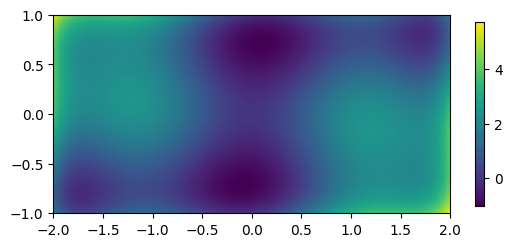

In [33]:
def fun(x, y):
    return (4 -2.1* x**2 + (1./3)*x**4)*x**2 +x*y + (4*y**2-4)*y**2


x_coordinates = np.linspace(-2, +2, 1000)
y_coordinates = np.linspace(-1, +1, 500)
xs, ys = np.meshgrid(x_coordinates, y_coordinates)
zs = fun(xs, ys)

fig, ax = plt.subplots()
pos = ax.imshow(zs, extent = (-2, +2, -1, +1)) # (left, right, bottom, top)
fig.colorbar(pos, ax=ax,  anchor=(0, 0.5), shrink=0.5)


In [36]:
from scipy import optimize
def f(x):
    return (4 -2.1* x[0]**2 + (1./3)*x[0]**4)*x[0]**2 +x[0]*x[1] + (4*x[1]**2-4)*x[1]**2
# the function is invariant under the transformation (x, y) -> (-x, -y)
# therefore I only need to check two out of the four minima
bounds1 = ((-0.5, +0.5), (0.5, 1.0))
bounds2 = ((1.5, 2.0), (0.5, 1.0))
res1 = optimize.minimize(f, x0 = (0, 0.7), bounds=bounds1)
res1.x
res2 = optimize.minimize(f, x0 = (1.7, 0.7), bounds=bounds2)
res2.x


print("(xa, ya): ", res1.x,"(xb, yb): ", -res1.x, "f:", f(res1.x)) # these are the two global minima
print(res2.x, -res2.x, f(res2.x)) 

res = optimize.minimize(f, x0 = (0, 0))
print(res.x, f(res.x)) # unable to find any of the minima. x0 = (0,0) is actually a saddle point.

(xa, ya):  [-0.08984206  0.71265636] (xb, yb):  [ 0.08984206 -0.71265636] f: -1.0316284534898517
[1.60710477 0.56865146] [-1.60710477 -0.56865146] 2.104250310311257
[0. 0.] 0.0


## 4\. FFT of a simple dataset

Performe a periodicity analysis on the lynxs-hares population

hare 0.09523809523809523
lynx 0.09523809523809523
carrot 0.09523809523809523


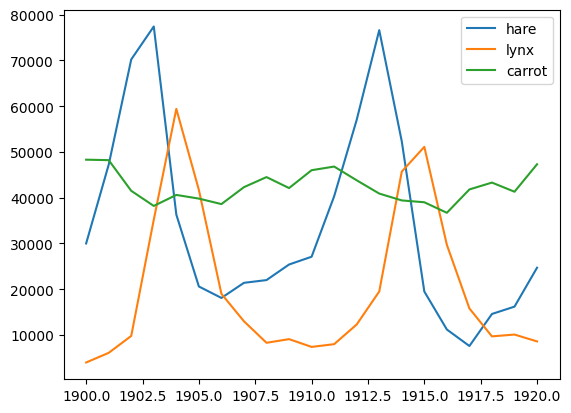

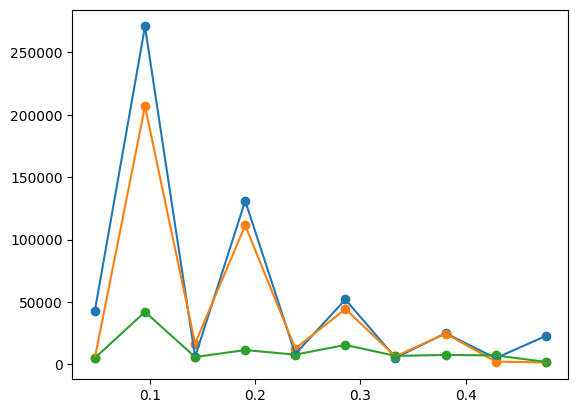

In [34]:
from scipy import fftpack

data = np.loadtxt("populations.txt", comments = "#", delimiter= "\t")
species = ["hare", "lynx", "carrot"]

plt.figure()

plt.plot(data[:, 0], data[:, 1:4], label = species)
plt.legend()

plt.figure()
time_step = 1 # one year
for i in range(0,3):
    sig = data[:, i+1]
    sig_fft = fftpack.fft(sig)
    power = np.abs(sig_fft)
    sample_freq = fftpack.fftfreq(sig.size, d=time_step)
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    plt.plot(sample_freq[pos_mask], power[pos_mask], label = species[i])
    plt.scatter(sample_freq[pos_mask], power[pos_mask], label = species[i])
    peak_freq = freqs[power[pos_mask].argmax()]
    peak_freq # 0.1 = 1/ (10 years), correct !
    print(species[i], peak_freq)
    


## 5\. FFT of an image

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.